# Introduction

## Types of ML

### Superivsed learning

use the dataset （**feature** & **label**） to produce a model that takes a feature vector x as input and outputs information that allows **deducing the label for this feature vector**.


### Unsupervised Learning

create a model that takes a feature vector x as input and either transforms it into **another vector or into a value**

* **Clustering**: the model returns the id of the cluster for each feature vector in the dataset;
  
* **Dimensionality reduction**: the output of the model is a feature vector that has fewer features than the input x;

* **Outlier detection**: the output is a real number that indicates how x is different from a “typical” example in the dataset.

### Semi-Supervised Learning

the dataset contains both **labeled** and **(more) unlabeled examples**, similar as supervised learning

### Reinforcement Learning

to learn a policy, which is a function that takes the feature vector of a state as input and **outputs an optimal action** to execute in that state


## Demo of supervised learning -- Linear SVM

In [9]:
import torch
import torch.nn as nn
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [10]:
# prepare data
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)
y = 2*y-1 # 0,1 to -1,1

Text(0, 0.5, 'Feature 2')

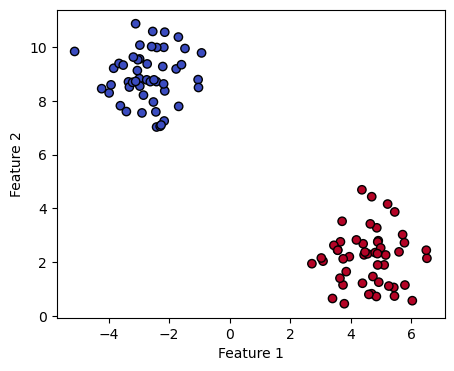

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [4]:
class LinearSVM(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

In [23]:
model = LinearSVM(input_dim=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Epoch [10/100], Loss: 0.0173
Epoch [20/100], Loss: 0.0095
Epoch [30/100], Loss: 0.0070
Epoch [40/100], Loss: 0.0070
Epoch [50/100], Loss: 0.0070
Epoch [60/100], Loss: 0.0070
Epoch [70/100], Loss: 0.0070
Epoch [80/100], Loss: 0.0069
Epoch [90/100], Loss: 0.0069
Epoch [100/100], Loss: 0.0069


/opt/anaconda3/envs/jax-fem-env/lib/python3.9/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


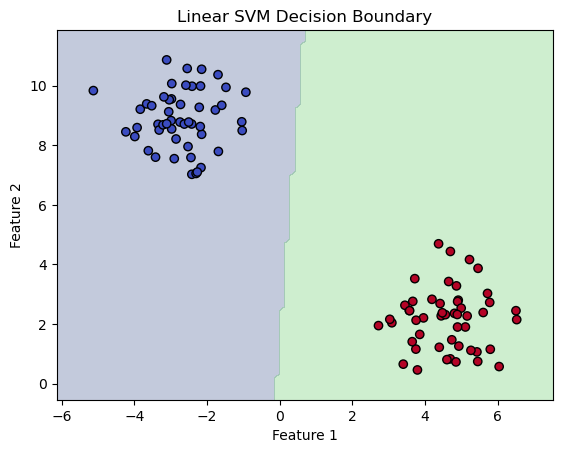

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成线性可分数据
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)
y = 2 * y - 1  # 将标签转换为{-1, +1}
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# 定义线性SVM模型
class LinearSVM(nn.Module):
    def __init__(self, input_dim):
        super(LinearSVM, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 单层线性层

    def forward(self, x):
        return self.linear(x)  # 输出 w^T x + b

# 初始化模型和优化器
model = LinearSVM(input_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.HingeEmbeddingLoss()  # PyTorch的Hinge Loss（需调整输入）

# 训练函数
def train_svm(X, y, model, optimizer, epochs=100, lambda_reg=0.01):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X).squeeze()  # 预测值
        hinge_loss = torch.mean(torch.clamp(1 - y * outputs, min=0))  # Hinge Loss
        l2_reg = lambda_reg * torch.norm(model.linear.weight)  # L2正则化
        loss = hinge_loss + l2_reg
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 训练模型
train_svm(X, y, model, optimizer, epochs=100, lambda_reg=0.01)

# 可视化结果
def plot_decision_boundary(X, y, model):
    w = model.linear.weight.detach().numpy()[0]
    b = model.linear.bias.detach().numpy()[0]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    preds = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds.detach().numpy() > 0, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Linear SVM Decision Boundary')

plot_decision_boundary(X, y, model)
plt.show()